In [47]:
#Please click Voila to run application.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
%matplotlib inline
import qgrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from IPython.display import HTML, display

In [21]:
display(HTML('''<a id='backtotop'></a>
 | &nbsp;
<a href='#interactivedatabase'>Interactive Table</a> &nbsp;|&nbsp;  
<a href='#confusionmatrix'>Confusion Matrix</a> &nbsp;|&nbsp;
<a href='#scatterplot'>Scatter Plot</a> &nbsp;|&nbsp;
<a href='#correlationmatrix'>Correlation Matrix</a> &nbsp;| 
<p>
<h1>Stroke Risk App</h1><p>
'''))

In [22]:
stroke = pd.read_csv("../capstone_project/healthcare-dataset-stroke-data.csv")

Stroke = stroke['stroke']
strokegrid = stroke.copy()


In [23]:
HTML('''<p>
<h3>Descriptive Methods</h3><p>''')

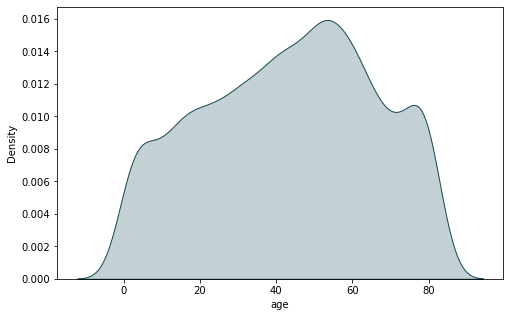

In [24]:
plt.figure(figsize = (8,5))
ax = sns.kdeplot(data=strokegrid, x='age', palette='cubehelix', color='#134954', fill=True)

/Users/jeffreychan/desktop/capstone_project/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeffreychan/desktop/capstone_project/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


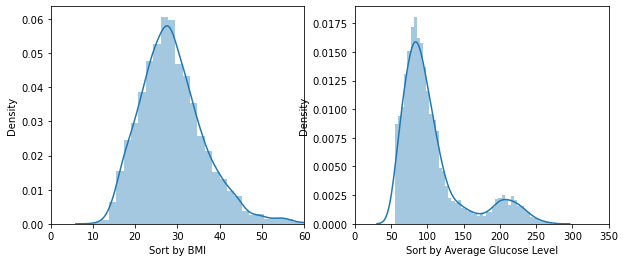

In [25]:
fig, (ax3,ax2) = plt.subplots(1,2,figsize=(10,4))

ax3 = sns.distplot(strokegrid["bmi"], ax=ax3, axlabel="Sort by BMI").set_xlim(0,60)

correlationmatrix=strokegrid.corr()
ax2=sns.distplot(strokegrid["avg_glucose_level"], ax=ax2, axlabel="Sort by Average Glucose Level").set_xlim(0,350)

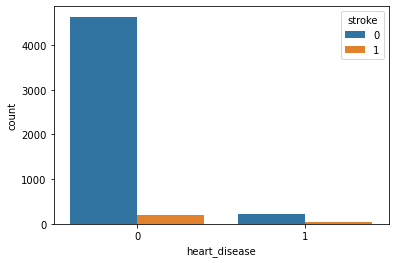

In [44]:
sns.countplot(x=stroke['heart_disease'],hue=stroke['stroke'])
plt.show()

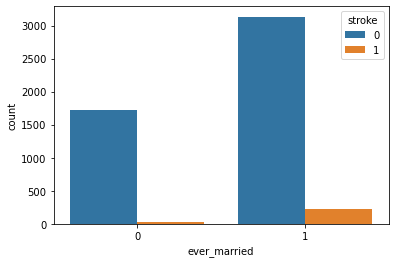

In [45]:
sns.countplot(x=stroke['ever_married'],hue=stroke['stroke'])
plt.show()

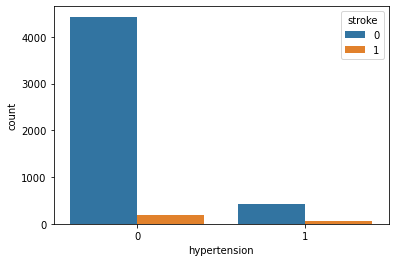

In [46]:
sns.countplot(x=stroke['hypertension'],hue=stroke['stroke'])
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = stroke.drop("stroke", axis=1)
y=stroke["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

lab = LabelEncoder()
gender = lab.fit_transform(stroke['gender'])
smoking_status = lab.fit_transform(stroke['smoking_status'])
work_type = lab.fit_transform(stroke['work_type'])
Residence_type = lab.fit_transform(stroke['Residence_type'])
ever_married = lab.fit_transform(stroke['ever_married'])

stroke['ever_married']=ever_married
stroke['Residence_type']=Residence_type
stroke['smoking_status']=smoking_status
stroke['gender']=gender
stroke['work_type']=work_type

In [38]:
stroke['bmi'] = stroke['bmi'].fillna(stroke['bmi'].mean());

In [29]:
stroke['age']=stroke['age'].astype('int')

In [30]:
X = stroke.drop('stroke',axis=1)
y = stroke["stroke"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [31]:
HTML('''<p>
<h3>Non-Descriptive Methods (Random Forest Classifier) </h3><p>''')

In [32]:
rf = RandomForestClassifier(n_estimators = 200) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("ACCURACY OF MODEL: ", metrics.accuracy_score(y_test, y_pred))

HTML('''
<a id='interactivedatabase'></a>
''')


ACCURACY OF MODEL:  0.9540117416829745


In [34]:
HTML('''<p>
<h3>Interactive Table</h3><p>''')

In [ ]:
HTML('''<a id="interacticedatabase"></a>
&nbsp; | &nbsp;<a href='#backtotop'>Back to Top</a> &nbsp; | &nbsp;&nbsp;<a href='#confusionmatrix'>Confusion Matrix</a> &nbsp; | &nbsp;<a href='#scatterplot'>Scatter Plot</a> &nbsp; | &nbsp;<a href='#correlationmatrix'>Correlation Matrix</a> &nbsp; | ''')

In [35]:


stroke_widget = qgrid.show_grid(strokegrid, grid_options={
     # SlickGrid options
    'fullWidthRows': False,
    'syncColumnCellResize': False,
    'forceFitColumns': True,
    'defaultColumnWidth': 70,
    'rowHeight': 25,
    'enableColumnReorder': False,
    'enableTextSelectionOnCells': True,
    'editable': False,
    'autoEdit': False,
    'explicitInitialization': True,
    
     # SlickGrid column options
    'defaultSortAsc': True,
    'maxWidth': 50,
    'minWidth': 10,
    'resizable': True,
    'sortable': True,
    'toolTip': "",
    'width': None
    
})


stroke_widget.layout.width = '2800px'
stroke_widget.layout.height = '500px'
stroke_widget

QgridWidget(grid_options={'fullWidthRows': False, 'syncColumnCellResize': False, 'forceFitColumns': True, 'def…

In [36]:
HTML('''<p>
<h3>Confusion Matrix</h3><p>''')

In [8]:
HTML('''<a id="confusionmatrix"></a>
&nbsp; | &nbsp;<a href='#interactivedatabase'>Interactive Table</a> &nbsp; | &nbsp;&nbsp;<a href='#backtotop'>Back to Top</a> &nbsp; | &nbsp;<a href='#scatterplot'>Scatter Plot</a> &nbsp; | &nbsp;<a href='#correlationmatrix'>Correlation Matrix</a> &nbsp; | ''')

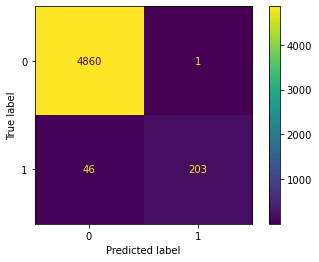

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

y_preds = rf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(rf, X=X, y=y)

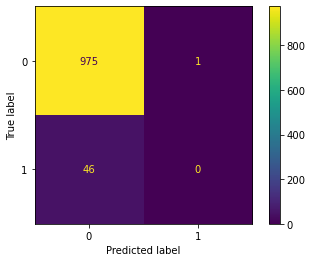

In [17]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

In [ ]:
HTML('''<p>
<h3>Scatterplot</h3><p>''')

In [18]:
HTML('''<a id="scatterplot"></a>
&nbsp; | &nbsp;<a href='#interactivedatabase'>Interactive Table</a> &nbsp; | &nbsp;&nbsp;<a href='#confusionmatrix'>Confusion Matrix</a> &nbsp; | &nbsp;<a href='#backtotop'>Back to Top</a> &nbsp; | &nbsp;<a href='#correlationmatrix'>Correlation Matrix</a> &nbsp; | ''')

<Figure size 1080x576 with 0 Axes>

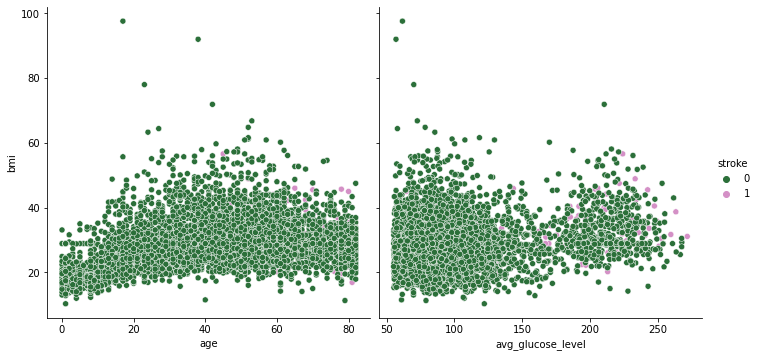

In [19]:
plt.figure(figsize = (15,8))
sns.pairplot(data=stroke, y_vars='bmi', x_vars=['age', 'avg_glucose_level'], hue='stroke',height=5,palette = 'cubehelix')

In [10]:
HTML('''<p>
<h3>Correlation Matrix</h3><p>''')

In [20]:
HTML('''<a id="correlationmatrix"></a>
&nbsp; | &nbsp;<a href='#interactivedatabase'>Interactive Table</a> &nbsp; | &nbsp;&nbsp;<a href='#confusionmatrix'>Confusion Matrix</a> &nbsp; | &nbsp;<a href='#scatterplot'>Scatter Plot</a> &nbsp; | &nbsp;<a href='#backtotop'>Back to Top </a> &nbsp; | ''')

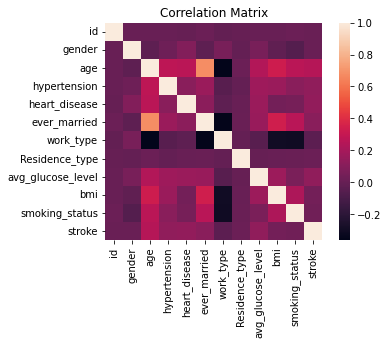

In [21]:
corrmat = stroke.corr()
ax2 = sns.heatmap(corrmat, vmax=1, square=True).set_title('Correlation Matrix')
